In [68]:
import json
import matplotlib.pyplot as plt
import numpy as np

from collections import defaultdict

In [82]:
data = []
users = defaultdict(list)

with open('../test_weight_4.0.json') as fp:
    for line in fp:
        line = json.loads(line)
        data.append(line)
        users[line['user']].append(line)

In [83]:
users.keys()

dict_keys(['YjS/mQOx', 'AIM0TOru', 'Nsr+jY0A', 'SMx6urqq', 'WfjtrxmT', 'HKV+gtB9', '5qQ0eQ1R', 'ZLCRWfEv', 'fAoTPYPL', 'jXaC97PB', 'AknRcHtR', 'Nw7u8qLC', 'ZDeo0Y8O', 'JtgUtTEq', '6SZoFI3a', 'wwjj3TQT', '2LLZUhZ2', '9anH9K01', 'o3tMwY72', 'apmEnfqy', 'rqRcar5a', '7jY3FNkf', 'rGM7ffKH', 'mWnmMZvf', 'GzCqsB8P', 'mXMC12GZ', '4sSxewiU', '+Xv/6Nop', 'HqmcL2Hh', 'bu7FYaPz', 'ZlhdkhgG', 'uXVe9IQf', 'hQWympTg', '4ERQl9jr', 'Num42/k8', 'kqO9XM8T', 'bDAnDoT2', 'vRCkbj3l', 'MzKsjyni', 'ZU+Pcbjs', 'j+Ec7rsC', 'SFLRXqqA', 'SX0Kg5HC', 'Ro2GlXjY', 'W5aXyP1G', 'RtwN80vq', 'kqirARhx', 'R5CUW5lh', 'vCeat3Eq', '6Iox8M7G', 'Iak5jjD5', 'mXCCfJeN', 'Dc0eIisl', 'z9FlLLzt', 'v35QBMcc', '/TLPIa66', 'HOGXKM4L', 'ugejT3H1', 'jph7mhva', 'iW7Quecc', 'fxc6ud70', 'KxwCPl2V', 'kdPKyczl', 'CKVpnYqn', 'BJX/HBTr', 'NiZg7Rnx', 'YUJ6Nmnb', 'n2z20qE5', '/2kCuNrB', 'VrKFU4ZE', 'yka558y8', 'G3aSuYdC', 'HI7m890h', 'wU6Xo9lP', 'D4C7e9MW', 'mHWxVwSA', '8favp0ag', 'vXHsti9y', 't2QjJgVj', 'C5SBI/le', 'QKWGdtnI', 'bI9cUAcT', 'IBQO

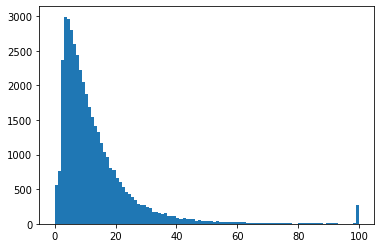

In [84]:
_, _, _ = plt.hist([instance['time'] for instance in data if instance['time'] < 200], bins=100)

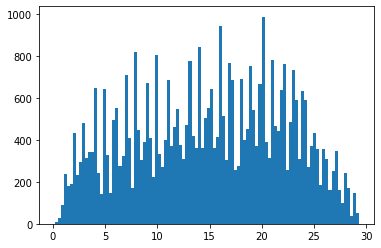

In [85]:
_, _, _ = plt.hist([instance['days'] for instance in data if instance['days']], bins=100)

In [86]:
len([instance for instance in data if sum(instance['predicted']) > 0])

18082

In [87]:
users['kKdm0/0g']

[{'logits': [[1.7365343570709229, -1.7293267250061035],
   [1.5275286436080933, -1.4753000736236572],
   [0.7089351415634155, -0.7378808259963989],
   [1.215728759765625, -1.2195011377334595]],
  'loss': 0.09362568706274033,
  'words': ['Il', 'a', 'un', 'tigre'],
  'predicted': [0, 0, 0, 0],
  'labels': [0, 0, 0, 0],
  'user': 'kKdm0/0g',
  'client': 'web',
  'format': 'reverse_translate',
  'countries': 'GB',
  'session': 'lesson',
  'days': 19.651,
  'time': 8.0},
 {'logits': [[2.0208382606506348, -2.1760828495025635],
   [2.05908203125, -2.056795597076416],
   [0.8416190147399902, -0.9165571331977844],
   [0.6593207716941833, -0.6546736359596252]],
  'loss': 0.10703890770673752,
  'words': ['Je', 'suis', 'un', 'serpent'],
  'predicted': [0, 0, 0, 0],
  'labels': [0, 0, 0, 0],
  'user': 'kKdm0/0g',
  'client': 'web',
  'format': 'reverse_translate',
  'countries': 'GB',
  'session': 'lesson',
  'days': 19.651,
  'time': 6.0},
 {'logits': [[0.6834700703620911, -0.725722074508667],
   

In [88]:
# compute user-level Macro-averaged F1
from sklearn.metrics import f1_score
from functools import reduce

scores = {}

for user, instances in users.items():
    predictions = reduce(lambda x, y: x + y['predicted'], instances, [])
    labels = reduce(lambda x, y: x + y['labels'], instances, [])
    
    scores[user] = (f1_score(labels, predictions), len(instances), sum(predictions), sum(labels))


/home/jdbarrow/anaconda3/envs/reteach/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/jdbarrow/anaconda3/envs/reteach/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [89]:
scores

{'YjS/mQOx': (0.16666666666666666, 71, 30, 30),
 'AIM0TOru': (0.0, 11, 0, 4),
 'Nsr+jY0A': (0.5142857142857143, 40, 17, 18),
 'SMx6urqq': (0.42857142857142855, 31, 18, 10),
 'WfjtrxmT': (0.5714285714285714, 34, 24, 25),
 'HKV+gtB9': (0.576923076923077, 29, 30, 22),
 '5qQ0eQ1R': (0.8837209302325582, 73, 86, 86),
 'ZLCRWfEv': (0.2, 18, 14, 6),
 'fAoTPYPL': (0.4, 18, 2, 3),
 'jXaC97PB': (0.38461538461538464, 42, 16, 10),
 'AknRcHtR': (0.3333333333333333, 10, 3, 3),
 'Nw7u8qLC': (0.0, 7, 1, 2),
 'ZDeo0Y8O': (0.608695652173913, 15, 13, 10),
 'JtgUtTEq': (0.4666666666666667, 26, 11, 19),
 '6SZoFI3a': (0.6285714285714286, 27, 13, 22),
 'wwjj3TQT': (0.48648648648648646, 28, 27, 10),
 '2LLZUhZ2': (0.4615384615384615, 19, 7, 6),
 '9anH9K01': (0.6666666666666666, 11, 4, 2),
 'o3tMwY72': (0.5000000000000001, 19, 5, 11),
 'apmEnfqy': (0.32, 16, 12, 13),
 'rqRcar5a': (0.0, 3, 0, 0),
 '7jY3FNkf': (0.17543859649122806, 111, 26, 31),
 'rGM7ffKH': (0.5853658536585366, 35, 20, 21),
 'mWnmMZvf': (0.815789

In [90]:
users['5qQ0eQ1R']

[{'logits': [[0.05014526844024658, -0.12520115077495575],
   [0.7844427824020386, -0.7333965301513672]],
  'loss': 0.40374746918678284,
  'words': ['Quatorze', 'cousins'],
  'predicted': [0, 0],
  'labels': [0, 0],
  'user': '5qQ0eQ1R',
  'client': 'ios',
  'format': 'reverse_translate',
  'countries': 'US',
  'session': 'practice',
  'days': 19.959,
  'time': 7.0},
 {'logits': [[0.8105618357658386, -1.201114296913147],
   [0.9938153624534607, -1.2928581237792969],
   [0.5128616690635681, -0.8110179901123047],
   [1.549396276473999, -1.620192050933838]],
  'loss': 0.12485362589359283,
  'words': ['Vous', 'êtes', 'ses', 'filles'],
  'predicted': [0, 0, 0, 0],
  'labels': [0, 0, 0, 0],
  'user': '5qQ0eQ1R',
  'client': 'ios',
  'format': 'reverse_tap',
  'countries': 'US',
  'session': 'practice',
  'days': 19.959,
  'time': 5.0},
 {'logits': [[2.0640885829925537, -2.0025784969329834],
   [1.0624481439590454, -1.2675318717956543],
   [1.8841454982757568, -1.894377589225769],
   [1.114004